In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Grafik parametreleri
sns.set()

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Hatalı floating değerlerden kaçının (örneğin, nokta çarpımındaki ters matrisler için)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
# np.set_printoptions(suppress=True)

# Giriş

Birim matrisi veya bir matrisin tersi, sonraki bölümlerde çok faydalı olacak kavramlardır. Bu bölümün sonunda ters matrisi kullanarak lineer denklem sistemlerini çözebileceğimizi göreceğiz. 

# 2.3 Birim ve Ters Matrisler (Identity and Inverse Matrices)


# Birim Matrisler

${I}_n$ birim matrisi, 1 ile doldurulmuş köşegen dışında $0$ ile doldurulmuş özel bir şekil matrisidir ($n \times n$).

<img src="https://drive.google.com/uc?id=1kzoM2mnvUYlBtFfiyu3WJceCtH8pROp4"  width="150" alt="Example of an identity matrix" title="Identity matrix">

<em>3'e 3'lük birim matris</em>

Numpy fonksiyonlarından `eye()` ile bir birimmatrisi oluşturulabilir:

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Özdeşlik matrisini bir vektöre 'uyguladığınızda' sonuç aynı vektördür:

$${I}_n{x} = {x}$$

### Örnek 1.

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}=
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 1 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 0 \times x_2 + 1\times x_3
\end{bmatrix}=
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}
$$

In [ ]:
x = np.array([[2], [6], [3]])
x

array([[2],
       [6],
       [3]])

In [ ]:
xid = np.eye(x.shape[0]).dot(x)
xid

array([[2.],
       [6.],
       [3.]])

## Ters Matrisler (Inverse Matrices)

${A}$ matrisinin tersi ${A}^{-1}$ olarak gösterilir. ${A}$ ile çarpıldığında birim matrisi veren matristir:

$${A}^{-1}{A}={I}_n$$

Bu, ${A}$ ile uzaya doğrusal bir dönüşüm uygularsak, ${A}^{-1}$ ile geri dönmenin mümkün olduğu anlamına gelir. Dönüşümü iptal etmek için bir yol sağlar.

### Örnek 2.

$$
{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$

Bu örnekte, ${A}$'ın tersini hesaplamak için `linalg.inv()` Numpy işlevini kullanacağız. ${A}$ oluşturarak başlayalım:

In [ ]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Şimdi tersini hesaplıyoruz:

In [ ]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

${A_{inv}}$ öğesinin Python ile ${A}$'ın tam tersi olduğunu kontrol edebiliriz:

In [ ]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.00000000e+00,  0.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Matrislerin tersinin, örneğin bir dizi lineer denklemi çözmek için çok yararlı olabileceğini göreceğiz. Bununla birlikte, kare olmayan matrislerin (satırlardan daha fazla sütun veya sütunlardan daha fazla satır içeren matrisler) tersinin olmadığını belirtmeliyiz.

# Lineer denklem sistemini çözme

Ters matris, ${Ax}={b}$ denklemini her terime ekleyerek çözmek için kullanılabilir:

$${A}^{-1}{Ax}={A}^{-1}{b}$$

Tanım olarak ${A}^{-1}{A}={I}$ olduğunu bildiğimiz için, elimizde:

$${I}_n{x}={A}^{-1}{b}$$

Bir vektörün birim matris ile çarpıldığında değişmediğini gördük. Böylece şunu yazabiliriz:

$${x}={A}^{-1}{b}$$

Bu harika! Sadece ${A}$'ın tersini hesaplayarak bir dizi lineer denklemi çözebilir ve bu matrisi ${b}$ sonuç vektörüne uygulayabiliriz!

Hadi deneyelim!

### Örnek 3.

Basit bir çözülebilir örnek alacağız:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$

[2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/) de gördüğümüz gösterimi uygulayacağız:

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$

Burada $x_1$, $x$'a ve $x_2$, $y$'a karşılık gelir. Böylece :

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

${A}$ ağırlık matrisimiz:

$$
{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

Ve bireysel denklemlerin çözümlerini içeren ${b}$ vektörü:

$$
{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Matris formu altında sistemlerimiz şöyle olur:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

${A}$'ın tersini bulalım:

In [ ]:
A = np.array([[2, -1], [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [ ]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

Ayrıca:

In [ ]:
b = np.array([[0], [3]])

Bunu gördüğümüzden beri

$${x}={A}^{-1}{b}$$

Biliyoruz ki :

In [ ]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

Bu bizim çözümümüz!

$$
{x}=
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

Bu, (1, 2) koordinatlarının noktasının çözüm olduğu ve denklemleri temsil eden doğruların kesiştiği noktada olduğu anlamına gelir. Bu çözümü kontrol etmeleri için onları çizelim:

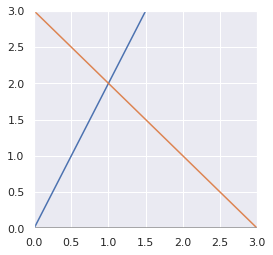

In [ ]:
x = np.arange(-10, 10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

Çözümün (çizgi geçişine karşılık gelen) $x=1$ ve $y=2$ olduğunda olduğunu görebiliriz. Matris inversiyonu ile bulduğumuz şeyi doğruluyor!

## BONUS: Kodlama ipucu - Bir denklem çizin

Matplotlib ile denklemi çizmek için önce tüm $x$ değerlerine sahip bir vektör oluşturmamız gerekiyor. Aslında bu bir doğru olduğu için sadece iki nokta yeterli olurdu. Ancak daha karmaşık işlevlerde, $x$ vektörünün uzunluğu örnekleme hızına karşılık gelir.Numpy'ın `arrange()` (see the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)) fonksiyonunu kullanacağız. [$-10$ ila $10$ (dahil değildir).]

In [ ]:
np.arange(-10, 10)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

İlk argüman başlangıç noktası ve ikincisi bitiş noktasıdır. Adımı belirtmek için üçüncü bir argüman ekleyebilirsiniz:

In [ ]:
np.arange(-10, 10, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

Ardından, $x$ vektörüne bağlı olan ikinci bir $y$ vektörü yaratırız. Numpy, $x$'ın her değerini alacak ve ona denklem formülünü uygulayacaktır.

In [ ]:
x = np.arange(-10, 10)
y = 2*x + 1
y

array([-19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19])

Son olarak, bu vektörleri çizmeniz yeterlidir.

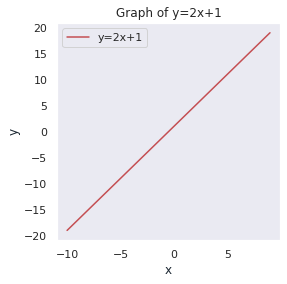

In [ ]:
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

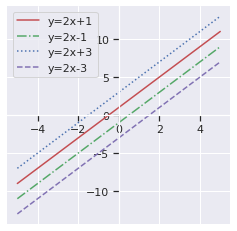

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, 2*x+1, '-r', label='y=2x+1')
plt.plot(x, 2*x-1,'-.g', label='y=2x-1')
plt.plot(x, 2*x+3,':b', label='y=2x+3')
plt.plot(x, 2*x-3,'--m', label='y=2x-3')
plt.legend(loc='upper left')
plt.show()

# Tekil matrisler

Bazı matrisler tersine çevrilemez. Bunlara **tekil** denir.

# Kapanış

Bu, lineer sisteme göre farklı durumlar sunar, çünkü ${A}^{-1}$, yalnızca ${Ax}={b}$ denkleminin bir ve yalnızca bir çözümü varsa vardır. [Bir sonraki bölüm](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.4-Linear-Dependence-and-Span/) neredeyse tamamen lineer denklem sistemleri ve çözüm sayısı ile ilgili.